In [1]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten
from keras.models import Model, load_model

Using TensorFlow backend.


In [2]:
X = []
Y = []

for i in range(0, 2000):
    img = Image.open('Shapes/' + str(i) + '.png')
    rgb_im = img.convert('RGB')
    data = np.asarray(rgb_im, dtype="int32") / 255
    
    X.append(data)

    if i < 500:
        Y.append(0) # circle

    elif i >= 500 and i < 1000:
        Y.append(1) # square

    elif i >= 1000 and i < 1500:
        Y.append(2) # star

    elif i >= 1500:
        Y.append(3) # triangle

In [3]:
X_train_original, X_test_original, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [4]:
X_train_original = np.asarray(X_train_original)
X_test_original = np.asarray(X_test_original)

In [5]:
X_train_original.shape

(1600, 128, 128, 3)

In [6]:
# this is our input placeholder
input_img = Input(shape=(128,128,3,))
conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(3, (3, 3), activation='relu', padding='same')(pool2)

#decoder
conv4 = Conv2D(8, (3, 3), activation='relu', padding='same')(conv3)
up1 = UpSampling2D((2, 2))(conv4)
conv5 = Conv2D(16, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv5)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same', name='final')(up2)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, conv3)

autoencoder.compile(optimizer='adam', loss='categorical_crossentropy')

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 3)         219       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 8)         224       
__________

In [8]:
h = autoencoder.fit(X_train_original, X_train_original,
                epochs=5,
                batch_size=64,
                shuffle=True,
                validation_data=(X_test_original, X_test_original))

Instructions for updating:
Use tf.cast instead.
Train on 1600 samples, validate on 400 samples
Epoch 1/5
1600/1600 [==============================] - 50s 31ms/step - loss: 2.6733 - val_loss: 2.6732
Epoch 2/5
1600/1600 [==============================] - 46s 29ms/step - loss: 2.6732 - val_loss: 2.6732
Epoch 3/5
1600/1600 [==============================] - 47s 30ms/step - loss: 2.6732 - val_loss: 2.6732
Epoch 4/5
1600/1600 [==============================] - 46s 29ms/step - loss: 2.6732 - val_loss: 2.6732
Epoch 5/5
1600/1600 [==============================] - 46s 29ms/step - loss: 2.6732 - val_loss: 2.6732


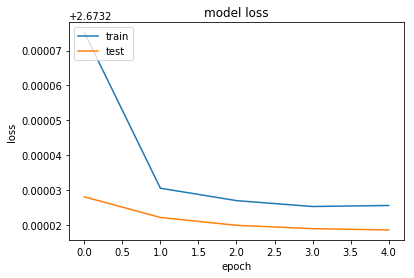

In [9]:
# summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
autoencoder.save('autoencoder.h5')
encoder.save('encoder.h5')

In [11]:
X_train_encoded = encoder.predict(X_train_original)
X_train_autoencoded = autoencoder.predict(X_train_original)

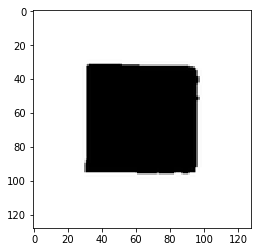

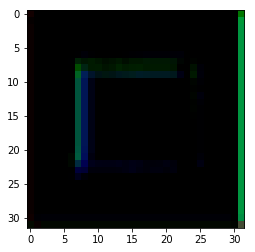

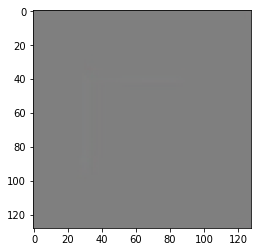

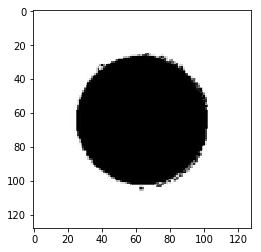

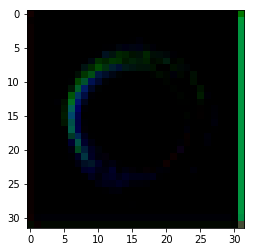

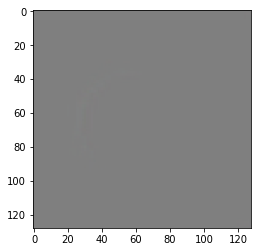

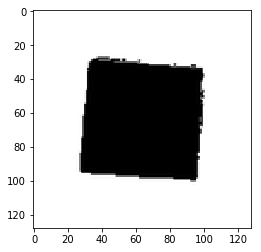

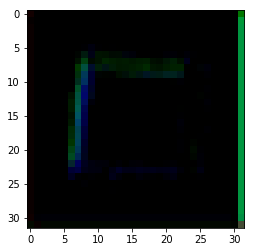

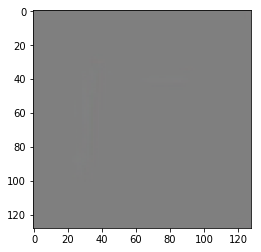

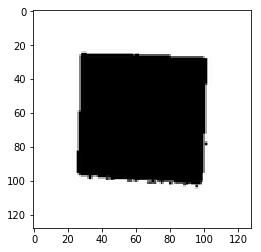

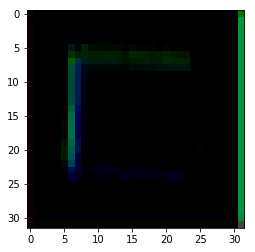

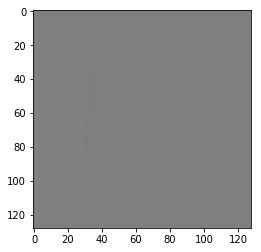

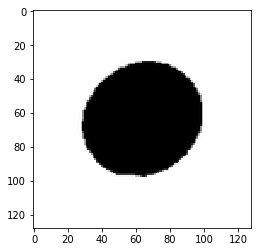

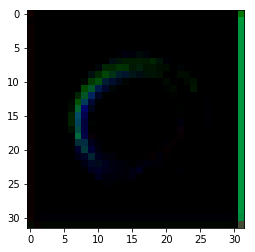

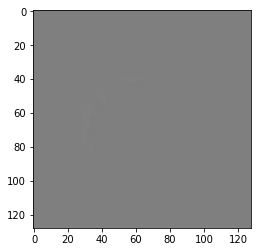

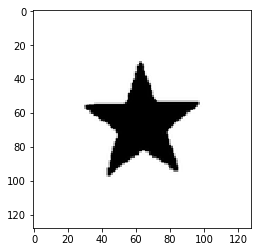

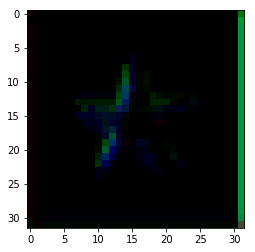

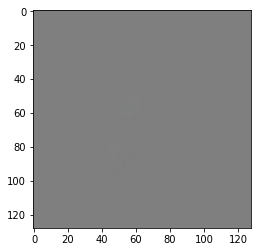

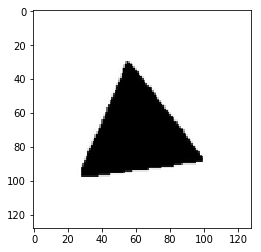

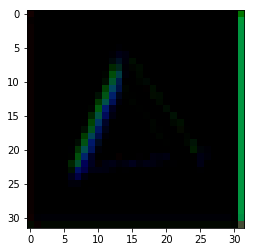

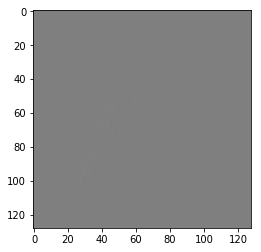

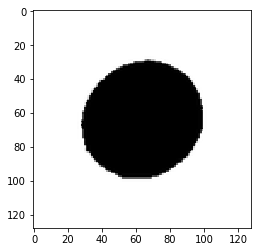

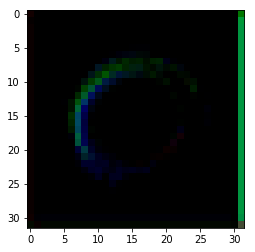

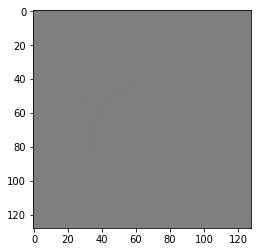

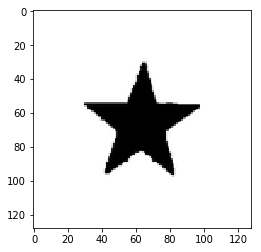

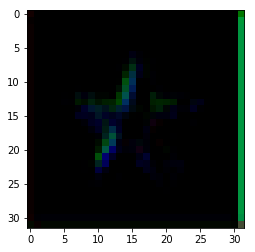

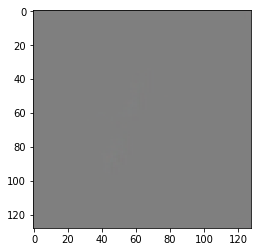

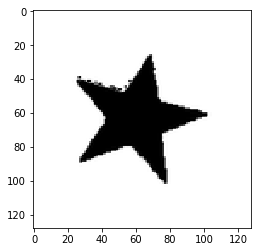

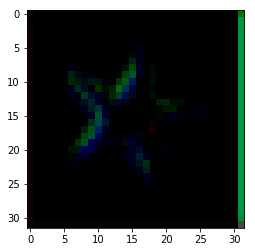

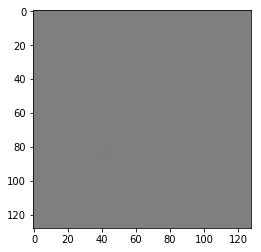

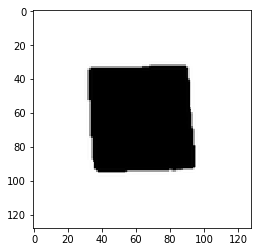

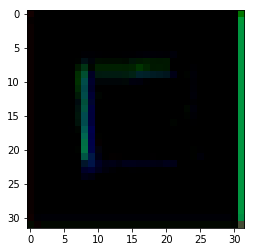

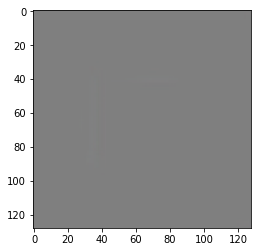

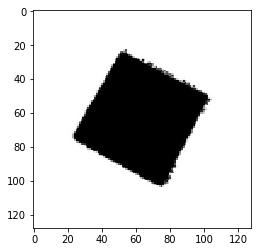

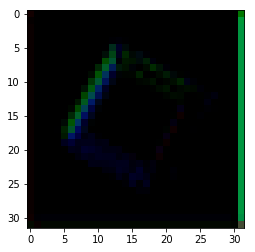

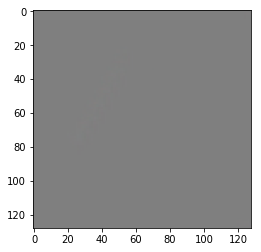

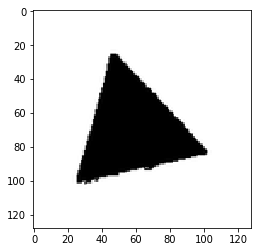

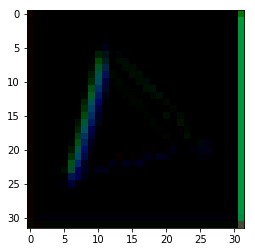

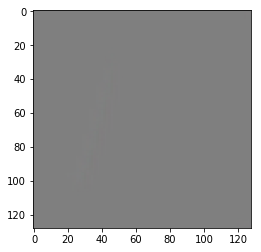

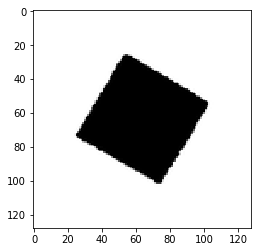

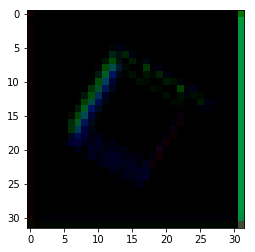

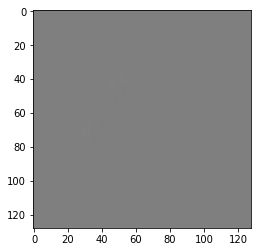

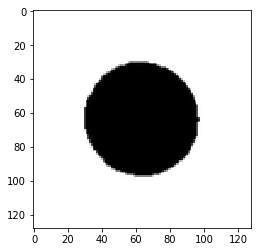

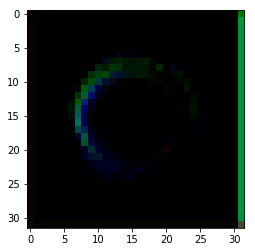

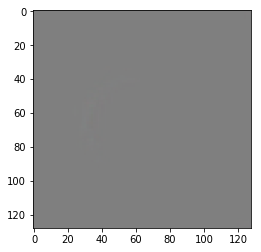

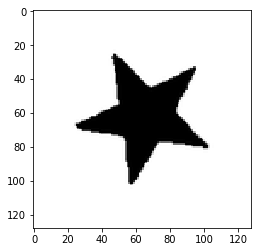

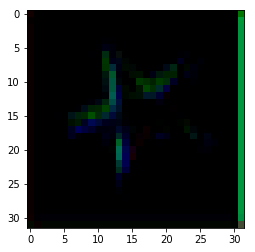

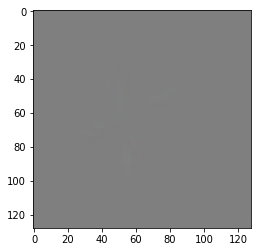

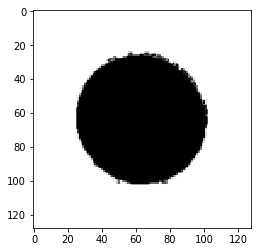

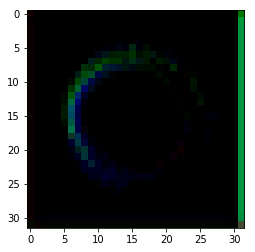

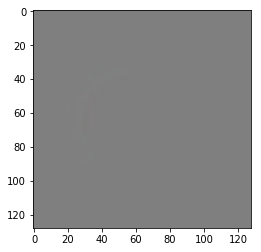

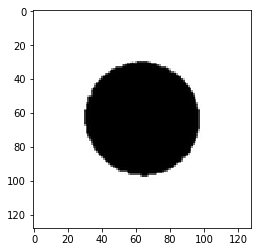

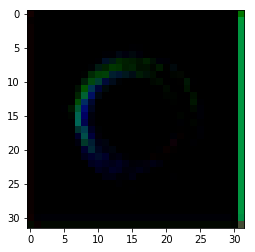

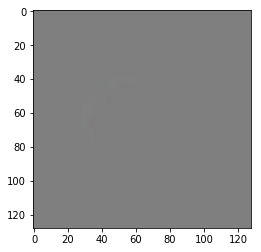

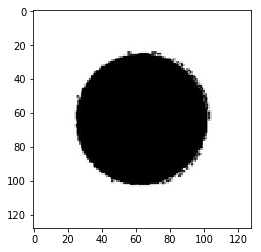

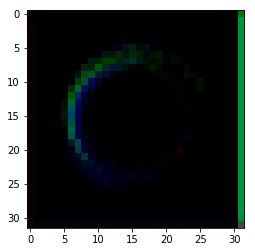

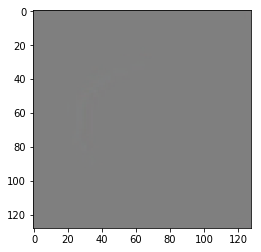

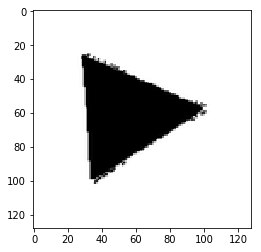

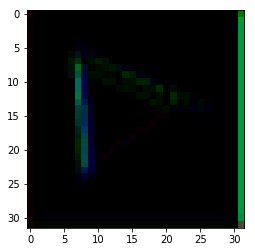

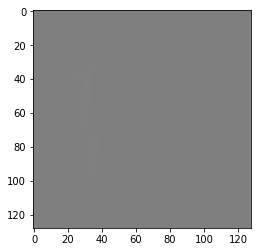

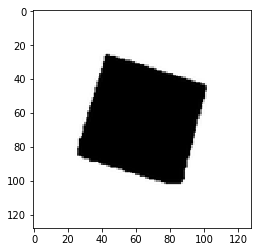

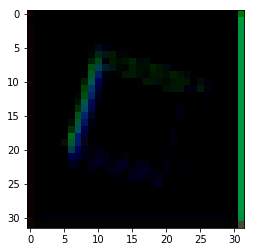

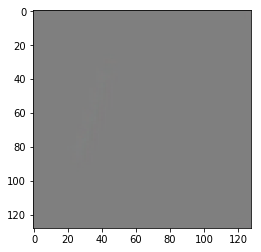

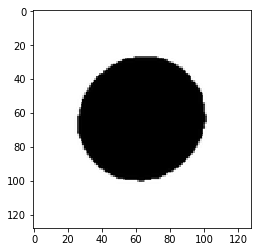

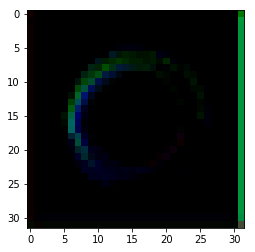

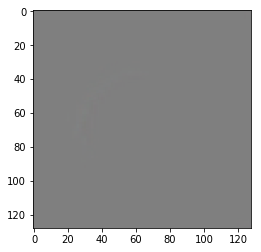

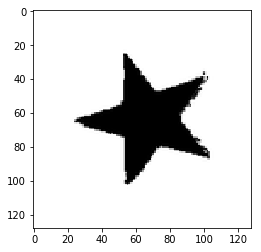

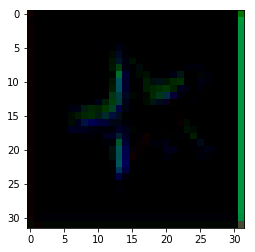

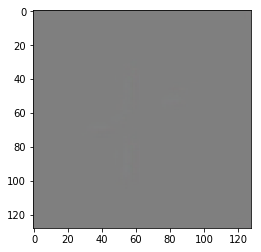

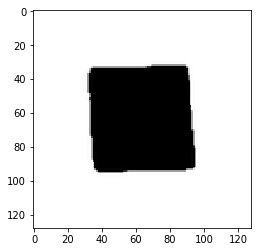

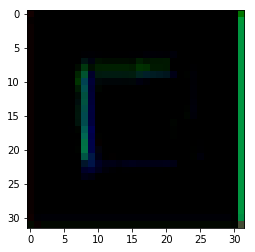

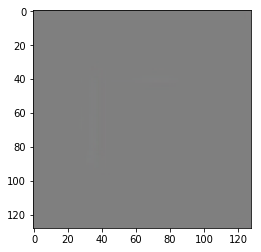

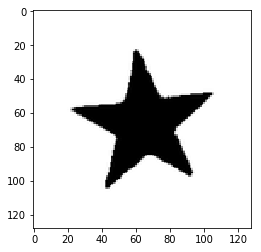

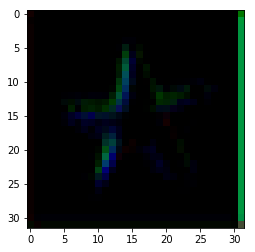

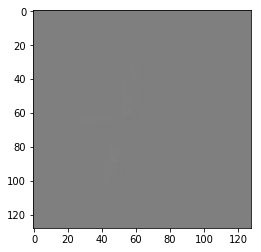

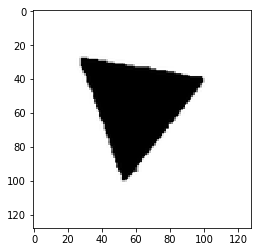

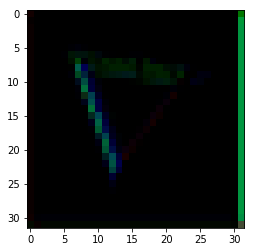

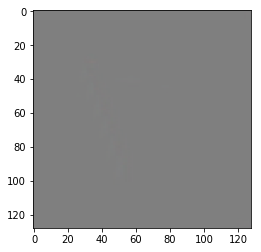

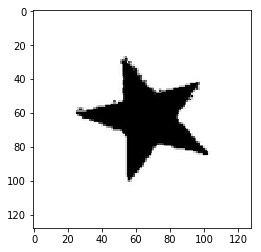

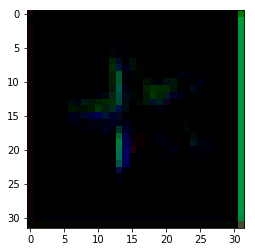

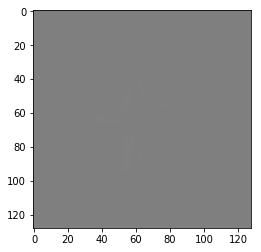

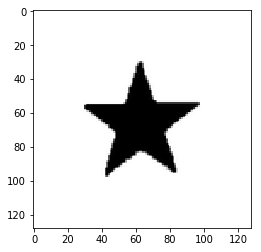

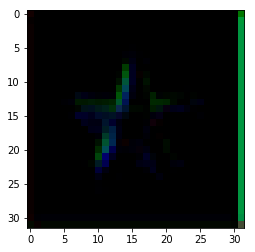

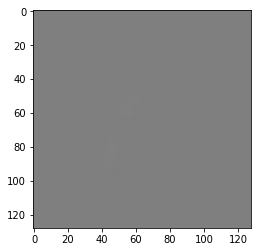

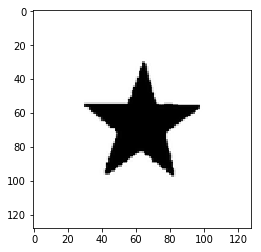

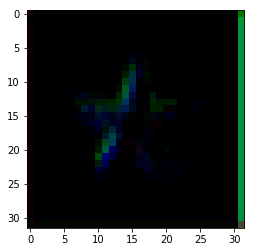

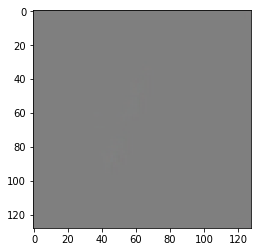

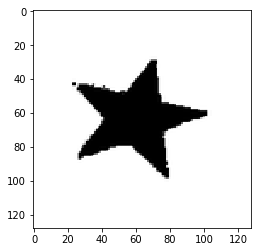

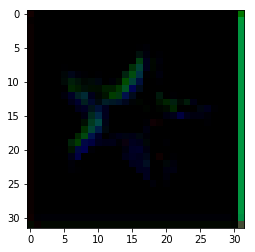

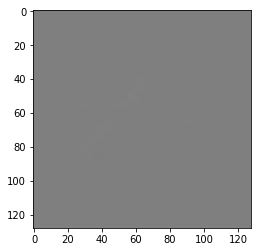

In [12]:
for i in range(30):
    #Original
    f = X_train_original[i]
    plt.imshow(f, interpolation='nearest')
    plt.show()
    #encoded
    f = X_train_encoded[i]
    plt.imshow(f, interpolation='nearest')
    plt.show()
    #autoencoded
    f = X_train_autoencoded[i]
    plt.imshow(f, interpolation='nearest')
    plt.show()